In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
power_forecasting=pd.read_csv('household_power_consumption.txt',sep=';')
power_forecasting.head()

C:\Users\benro\AppData\Local\Temp\ipykernel_21080\2771431742.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  power_forecasting=pd.read_csv('household_power_consumption.txt',sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
power_forecasting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [13]:
columns_to_convert=['Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2']

for column in columns_to_convert:
    power_forecasting[column] = pd.to_numeric(power_forecasting[column],errors='coerce')


In [15]:
power_forecasting['Datetime']=pd.to_datetime(power_forecasting['Date'] + ' ' + power_forecasting['Time'],format='%d/%m/%Y %H:%M:%S')

power_forecasting.drop(columns=['Date','Time'],inplace=True)
power_forecasting['date']=power_forecasting['Datetime'].dt.date
power_forecasting['day']=power_forecasting['Datetime'].dt.day 
power_forecasting['month']=power_forecasting['Datetime'].dt.month
power_forecasting['year']=power_forecasting['Datetime'].dt.year 
power_forecasting['hour']=power_forecasting['Datetime'].dt.hour
power_forecasting['minute']=power_forecasting['Datetime'].dt.minute
power_forecasting['second']=power_forecasting['Datetime'].dt.second
power_forecasting['weekday_name']=power_forecasting['Datetime'].dt.day_name()

power_forecasting['week_type']=power_forecasting['Datetime'].dt.weekday.apply(lambda x:'Weekend' if x>=5 else 'Weekday')
power_forecasting.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,date,day,month,year,hour,minute,second,weekday_name,week_type
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006-12-16,16,12,2006,17,24,0,Saturday,Weekend
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006-12-16,16,12,2006,17,25,0,Saturday,Weekend
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006-12-16,16,12,2006,17,26,0,Saturday,Weekend
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006-12-16,16,12,2006,17,27,0,Saturday,Weekend
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006-12-16,16,12,2006,17,28,0,Saturday,Weekend


In [16]:
power_forecasting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   date                   object        
 9   day                    int32         
 10  month                  int32         
 11  year                   int32         
 12  hour                   int32         
 13  minute                 int32         
 14  second                 int32         
 15  weekday_name           object        
 16  week_type              object        
dtypes: datetime64[ns](1), float64(7), int32(6), object(3)
memory usag

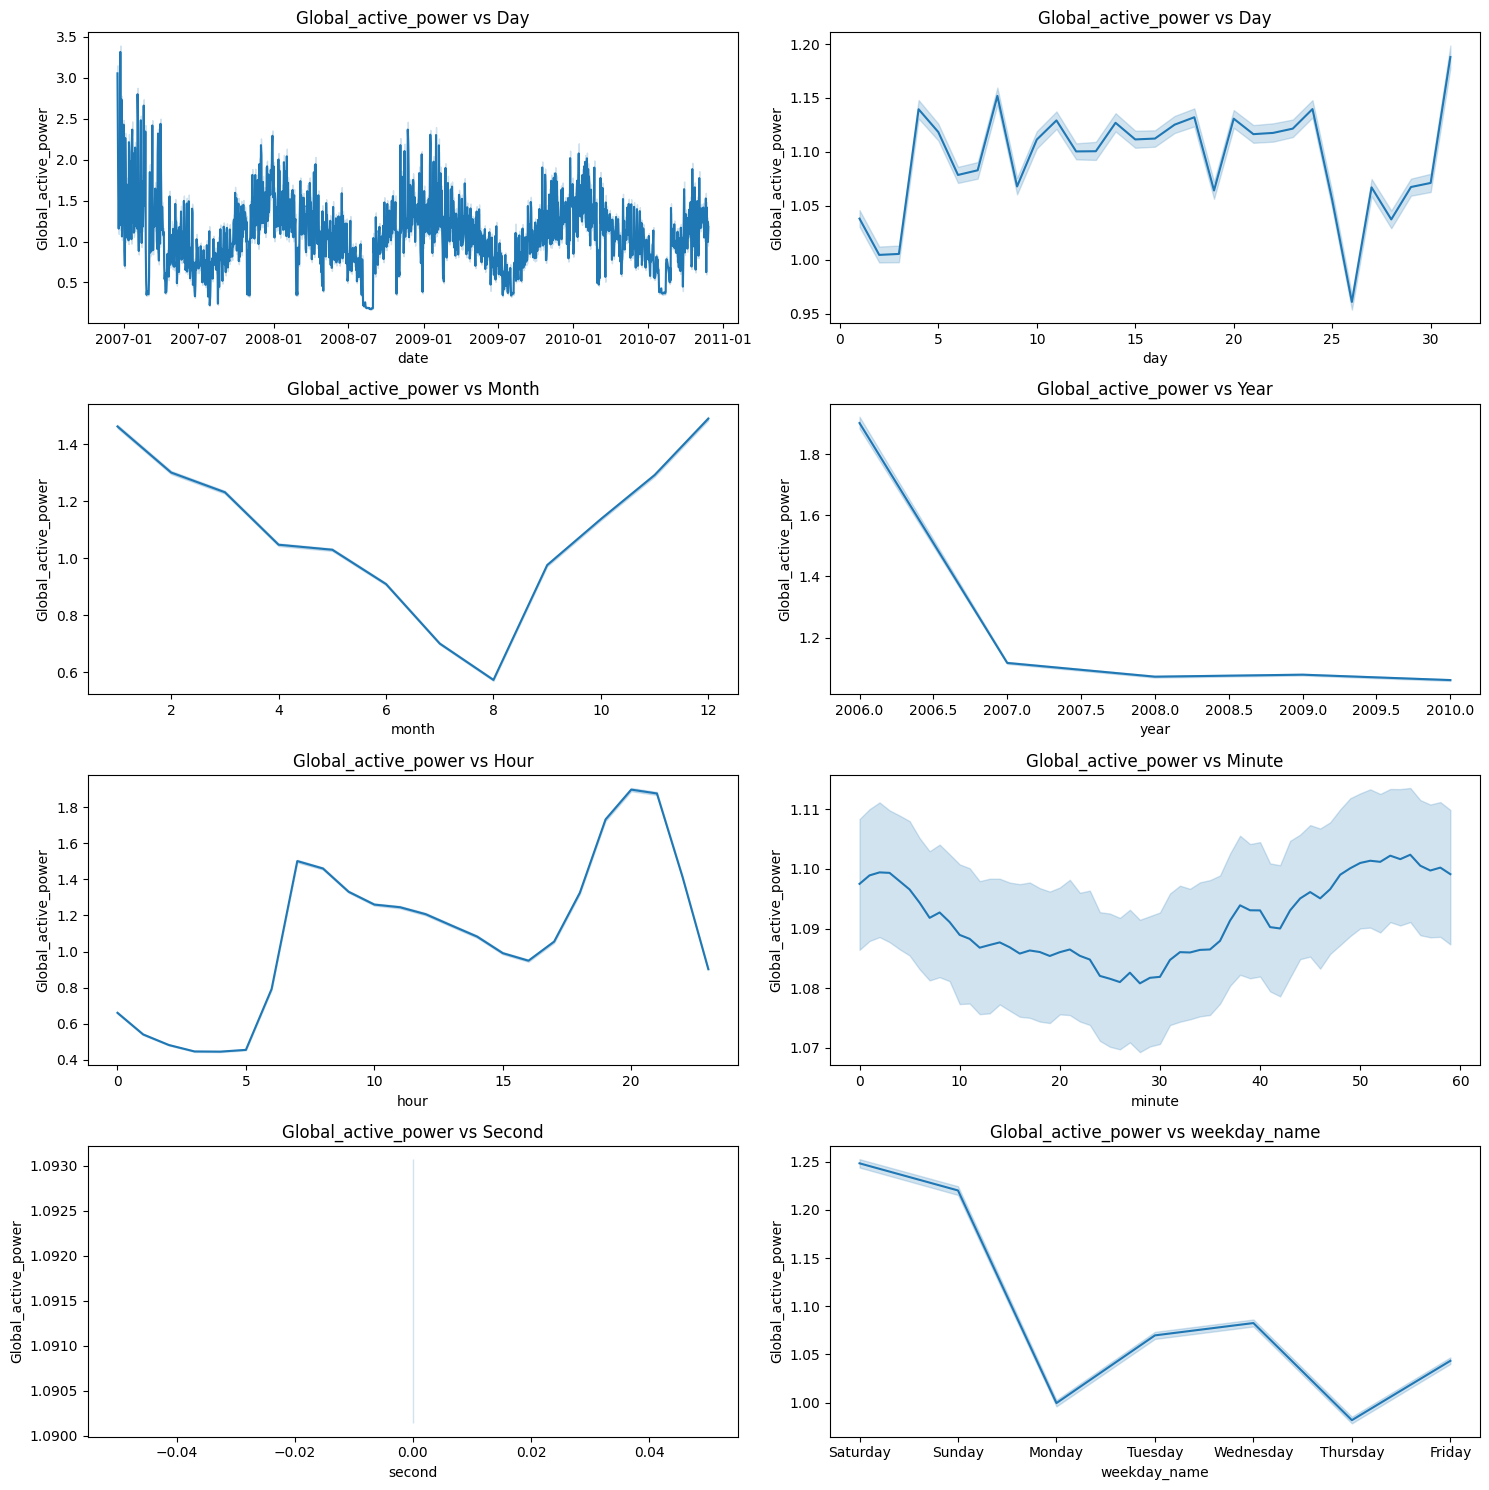

In [21]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.lineplot(data=power_forecasting, x='date', y='Global_active_power', ax=axs[0, 0])
axs[0, 0].set_title('Global_active_power vs Day')

sns.lineplot(data=power_forecasting, x='day', y='Global_active_power', ax=axs[0, 1])
axs[0, 1].set_title('Global_active_power vs Day')

sns.lineplot(data=power_forecasting, x='month', y='Global_active_power', ax=axs[1, 0])
axs[1, 0].set_title('Global_active_power vs Month')

sns.lineplot(data=power_forecasting, x='year', y='Global_active_power', ax=axs[1, 1])
axs[1, 1].set_title('Global_active_power vs Year')

sns.lineplot(data=power_forecasting, x='hour', y='Global_active_power', ax=axs[2, 0])
axs[2, 0].set_title('Global_active_power vs Hour')

sns.lineplot(data=power_forecasting, x='minute', y='Global_active_power', ax=axs[2, 1])
axs[2, 1].set_title('Global_active_power vs Minute')

sns.lineplot(data=power_forecasting, x='second', y='Global_active_power', ax=axs[3, 0])
axs[3, 0].set_title('Global_active_power vs Second')

sns.lineplot(data=power_forecasting, x='weekday_name', y='Global_active_power', ax=axs[3, 1])
axs[3, 1].set_title('Global_active_power vs weekday_name')

plt.tight_layout()
plt.show()
